In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from pandas import get_dummies
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

<h1>Load data</h1>

In [2]:
file_name = "iris.data.csv"

In [3]:
#load the dataset into memory
dataset = pd.read_csv(file_name,header=None,\
                      names=['sepal_length','sepal_width','petal_length','petal_width','species'])
#check several examples of data
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


<h1>Data preprocessing</h1>

In [4]:
#simple function to process the data.
"""
input:
    data: iris dataset
    num_features: 2 => select only petal width and petal width.
                  4 => select all features
    flower: 'Iris-setosa' => labels of Iris-setosa will be 1 and others will be 0
            'Iris-virginica' => labels of Iris-virginica will be 1 and others will be 0
            'None' => use one-hot encoding to represent the labels

return:
    x: normalized & shuffled data
    y: labels
"""
def data_preprocessing(data,num_features,flower=None):
    if num_features==2:
        features = data.columns[2:4]
    else:
        features = data.columns[0:4]
    labels = dataset.columns[4]
    print(features)
    print(labels)
    #normalize the data
    data_norm = pd.DataFrame(data)
    for feature in features:
        data[feature] = (data[feature]-data[feature].mean())/data[feature].std()

    #shuffle the data
    indices = data_norm.index.tolist()
    indices = np.array(indices)
    np.random.shuffle(indices)
    x = data_norm.reindex(indices)[features]
    y = data_norm.reindex(indices)[labels]
    if flower=='Iris-setosa':
        for i in range(len(y)):
            y[i]=1 if y[i]=='Iris-setosa' else 0
        y = y.values.reshape(len(y),1)
    elif flower=='Iris-virginica':
        for i in range(len(y)):
            y[i]=1 if y[i]=='Iris-virginica' else 0
        y = y.values.reshape(len(y),1)
    else:
        y = get_dummies(y)
    return x,y

<h1>Part a:

In [5]:
x_1,y_1 = data_preprocessing(dataset,2,flower='Iris-setosa')
#generate traning and validation sets
x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(x_1,y_1,test_size=0.3)

Index(['petal_length', 'petal_width'], dtype='object')
species


<h2>Define hyper-parameters</h2>

In [6]:
num_steps_1 = 200
num_train_1 = np.shape(x_train_1)[0]
num_test_1 = np.shape(x_test_1)[0]
lr_1 = 0.01

<h2>Define Placeholder and Variables</h2>

In [7]:
tf.reset_default_graph()
X_1 = tf.placeholder(tf.float32,shape=[num_train_1,2],name='X_1')
Y_1 = tf.placeholder(tf.float32,shape=[num_train_1,1],name='Y_1')
W_1 = tf.Variable(tf.random_normal([2,1]),tf.float32,name='W_1')
b_1 = tf.Variable(tf.zeros([1,1]),tf.float32,name='b_1')

X_1_test = tf.placeholder(tf.float32,shape=[num_test_1,2],name='X_1_test')
Y_1_test = tf.placeholder(tf.float32,shape=[num_test_1,1],name='Y_1_test')

Instructions for updating:
Colocations handled automatically by placer.


<h2>Define update rule and accuracy</h2>

In [8]:
Y_hat_1 = tf.sigmoid(tf.add(tf.matmul(X_1,W_1),b_1))
error_1 = tf.reduce_mean(tf.square(Y_1-Y_hat_1))
optimizer_1 = tf.train.AdamOptimizer(learning_rate = lr_1)
train_op_1 = optimizer_1.minimize(error_1)
correct_pred_1 = tf.equal(tf.round(Y_hat_1),Y_1)
accuracy_1 = tf.reduce_mean(tf.cast(correct_pred_1,tf.float32),name='accuracy_1')

Y_hat_1_test = tf.sigmoid(tf.add(tf.matmul(X_1_test,W_1),b_1))
correct_pred_1_test = tf.equal(tf.round(Y_hat_1_test),Y_1_test)
accuracy_1_test = tf.reduce_mean(tf.cast(correct_pred_1_test,tf.float32),name='accuracy_1_test')

init_1 = tf.global_variables_initializer()

<h2>Execute training</h2>

In [9]:
acc_1 = np.zeros(num_steps_1)

with tf.Session() as sess:
    sess.run(init_1) 
    for i in range(num_steps_1):
        sess.run(train_op_1, feed_dict={X_1:x_train_1, Y_1:y_train_1})
        acc_1[i] = sess.run(accuracy_1,feed_dict={X_1:x_train_1, Y_1:y_train_1})
    
    print("Training finished!")
    print("Testing Accuracy:", sess.run(accuracy_1_test, feed_dict={X_1_test:x_test_1, Y_1_test:y_test_1}))
    W_1 = np.squeeze(sess.run(W_1))
    b_1 = np.squeeze(sess.run(b_1))

Training finished!
Testing Accuracy: 1.0


<h2>Plot</h2>

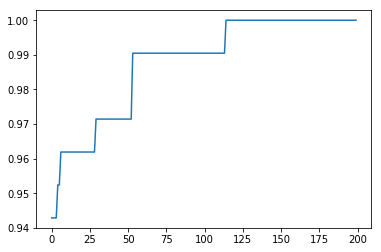

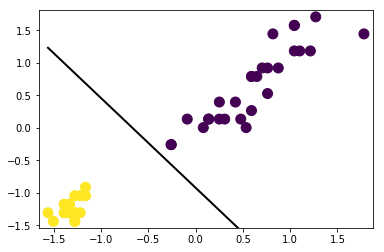

In [10]:
plt.plot(range(len(acc_1)),acc_1)
plt.show()
plot_x = np.array([np.min(x_test_1['petal_length'][:]), np.max(x_test_1['petal_width'][:])])
plot_y = 1 / W_1[1] * (-W_1[0] * plot_x - b_1)
plt.scatter(x_test_1['petal_length'][:], x_test_1['petal_width'][:], c=np.squeeze(y_test_1), s=100, cmap='viridis')
plt.plot(plot_x, plot_y, color='k', linewidth=2)
plt.xlim([np.min(x_test_1['petal_length'][:]) - 0.1,np.max(x_test_1['petal_length'][:]) + 0.1]);
plt.ylim([np.min(x_test_1['petal_width'][:]) - 0.1,np.max(x_test_1['petal_width'][:]) + 0.1]);
plt.show()

I didn't use batch, so every iteration is a epoch.
The accuracy is 100%. As we could see in the picture above, the data could be completely divided, so we could use only petal length and width to seperate setosa and non_setosa. 

<h1>Part b:</h1>

In [11]:
x_2,y_2 = data_preprocessing(dataset,2,flower='Iris-virginica')
#generate traning and validation sets
x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(x_2,y_2,test_size=0.3)

Index(['petal_length', 'petal_width'], dtype='object')
species


<h2>Define hyper-parameter</h2>

In [12]:
num_steps_2 = 200
num_train_2 = np.shape(x_train_2)[0]
num_test_2 = np.shape(x_test_2)[0]
lr_2 = 0.01

<h2>Define Placeholder and Variables</h2>

In [13]:
tf.reset_default_graph()
X_2 = tf.placeholder(tf.float32,shape=[num_train_2,2],name='X_2')
Y_2 = tf.placeholder(tf.float32,shape=[num_train_2,1],name='Y_2')
W_2 = tf.Variable(tf.random_normal([2,1]),tf.float32,name='W_2')
b_2 = tf.Variable(tf.zeros([1,1]),tf.float32,name='b_2')

X_2_test = tf.placeholder(tf.float32,shape=[num_test_2,2],name='X_2_test')
Y_2_test = tf.placeholder(tf.float32,shape=[num_test_2,1],name='Y_2_test')

<h2>Define update rule and accuracy</h2>

In [14]:
Y_hat_2 = tf.sigmoid(tf.add(tf.matmul(X_2,W_2),b_2))
error_2 = tf.reduce_mean(tf.square(Y_2-Y_hat_2))
optimizer_2 = tf.train.AdamOptimizer(learning_rate = lr_2)
train_op_2 = optimizer_2.minimize(error_2)
correct_pred_2 = tf.equal(tf.round(Y_hat_2),Y_2)
accuracy_2 = tf.reduce_mean(tf.cast(correct_pred_2,tf.float32),name='accuracy_2')

Y_hat_2_test = tf.sigmoid(tf.add(tf.matmul(X_2_test,W_2),b_2))
correct_pred_2_test = tf.equal(tf.round(Y_hat_2_test),Y_2_test)
accuracy_2_test = tf.reduce_mean(tf.cast(correct_pred_2_test,tf.float32),name='accuracy_2_test')

init_2 = tf.global_variables_initializer()

<h2>Execute training</h2>

In [15]:
acc_2 = np.zeros(num_steps_2)

with tf.Session() as sess:
    sess.run(init_2) 
    for i in range(num_steps_2):
        sess.run(train_op_2, feed_dict={X_2:x_train_2, Y_2:y_train_2})
        acc_2[i] = sess.run(accuracy_2,feed_dict={X_2:x_train_2, Y_2:y_train_2})

    print("Training finished!")
    print("Testing Accuracy:", sess.run(accuracy_2_test, feed_dict={X_2_test:x_test_2, Y_2_test:y_test_2}))
    W_2 = np.squeeze(sess.run(W_2))
    b_2 = np.squeeze(sess.run(b_2))

Training finished!
Testing Accuracy: 0.9777778


<h2>Plot</h2>

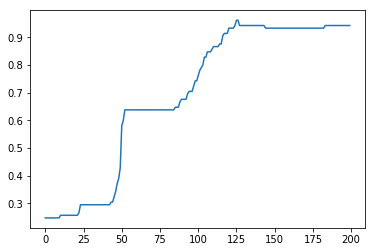

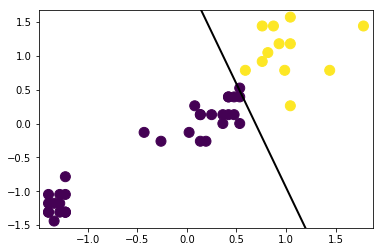

In [16]:
plt.plot(range(len(acc_2)),acc_2)
plt.show()
plot_x = np.array([np.min(x_test_2['petal_length'][:]), np.max(x_test_2['petal_width'][:])])
plot_y = 1 / W_2[1] * (-W_2[0] * plot_x - b_2)
plt.scatter(x_test_2['petal_length'][:], x_test_2['petal_width'][:], c=np.squeeze(y_test_2), s=100, cmap='viridis')
plt.plot(plot_x, plot_y, color='k', linewidth=2)
plt.xlim([np.min(x_test_2['petal_length'][:]) - 0.1,np.max(x_test_2['petal_length'][:]) + 0.1]);
plt.ylim([np.min(x_test_2['petal_width'][:]) - 0.1,np.max(x_test_2['petal_width'][:]) + 0.1]);
plt.show()

The accuracy is 0.97. The test data couldn't be divided into two classes, so we can't just use petal length and width to seperate virginica and non-virginica.

<h1>Part c:</h1>

In [17]:
x_3,y_3 = data_preprocessing(dataset,4)
#generate traning and validation sets
x_train_3, x_test_3, y_train_3, y_test_3 = train_test_split(x_3,y_3,test_size=0.3)

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')
species


<h2>Define hyper-parameters</h2>

In [18]:
num_steps = 200
num_train = np.shape(x_train_1)[0]
num_test = np.shape(x_test_1)[0]
n_hidden_1 = 256
n_hidden_2 = 128
n_classes = 3
lr = 0.01

<h2>Define placehoder and variables</h2>

In [19]:
tf.reset_default_graph()
X = tf.placeholder(tf.float32,shape=[num_train,4],name='X')
Y = tf.placeholder(tf.float32,shape=[num_train,3],name='Y')
weights = {
    'W1': tf.Variable(tf.random_normal([4, n_hidden_1]),name='W1'),
    'W2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2]),name='W2'),
    'Wout': tf.Variable(tf.random_normal([n_hidden_2, n_classes]),name='Wout')
}

biases = {
    'b1': tf.Variable(tf.zeros(shape=[n_hidden_1]),name='b1'),
    'b2': tf.Variable(tf.zeros(shape=[n_hidden_2]),name='b2'),
    'bout': tf.Variable(tf.zeros(shape=[n_classes]),name='bout')
}

X_test = tf.placeholder(tf.float32,shape=[num_test,4],name='X_test')
Y_test = tf.placeholder(tf.float32,shape=[num_test,3],name='Y_test')

<h2>Define the neural network</h2>

In [20]:
def neural_net(x):
    layer_out_1 = tf.add(tf.matmul(x,weights['W1']),biases['b1'])
    layer_out_1 = tf.nn.relu(layer_out_1)
    layer_out_2 = tf.add(tf.matmul(layer_out_1,weights['W2']),biases['b2'])
    layer_out_2 = tf.nn.relu(layer_out_2)
    out = tf.add(tf.matmul(layer_out_2,weights['Wout']),biases['bout'])
    # out = tf.round(tf.sigmoid(out))
    return out

<h2>Define cost function and accuracy</h2>

In [21]:
logits = neural_net(X)
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits,labels=Y),name='loss')
optimizer = tf.train.AdamOptimizer(learning_rate=lr)
train_op = optimizer.minimize(loss)
correct_pred = tf.equal(tf.argmax(logits,1),tf.argmax(Y,1))
accuracy = tf.reduce_mean(tf.cast(correct_pred,tf.float32),name='accuracy')

logits_test = neural_net(X_test)
correct_pred_test = tf.equal(tf.argmax(logits_test,1),tf.argmax(Y_test,1))
accuracy_test = tf.reduce_mean(tf.cast(correct_pred_test,tf.float32),name='accuracy_test')

init = tf.global_variables_initializer()

<h2>Execute training</h2>

In [22]:
acc = np.zeros(num_steps)

with tf.Session() as sess:
    sess.run(init)
    for i in range(num_steps):
        sess.run(train_op, feed_dict={X:x_train_3, Y:y_train_3})
        acc[i] = sess.run(accuracy,feed_dict={X:x_train_3, Y:y_train_3})
    
    print("Training finished!")
    print("Testing Accuracy:", sess.run(accuracy_test, feed_dict={X_test:x_test_3, Y_test:y_test_3}))

Training finished!
Testing Accuracy: 1.0


<h2>Plot</h2>

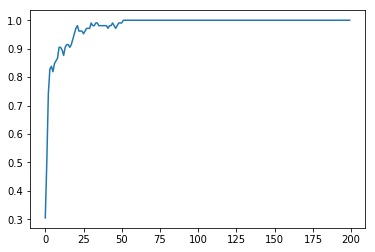

In [23]:
plt.plot(range(len(acc)),acc)
plt.show()